In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Data importing and Cleaning

In [2]:
data = pd.read_csv('LifeExpectancyData.csv')
data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,Afghanistan,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,Afghanistan,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,Afghanistan,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,Afghanistan,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,Afghanistan,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [3]:
pd.isnull(data).sum()

Country                     0
Year                        0
Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
Polio                      19
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
dtype: int64

In [4]:
data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP'],
      dtype='object')

In [5]:
data = data.drop(['Country'], axis= 'columns')
data.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [6]:
data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', 'GDP'],
      dtype='object')

In [7]:
le = data['Life expectancy ']
print(le)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64


In [8]:

pd.isnull(data).sum()

Year                        0
Life expectancy            10
Adult Mortality            10
infant deaths               0
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
Measles                     0
 BMI                       34
Polio                      19
Diphtheria                 19
 HIV/AIDS                   0
GDP                       448
dtype: int64

In [9]:
data['Life expectancy '] = data['Life expectancy '].fillna(np.mean(data['Life expectancy ']))
data['Adult Mortality'] = data['Adult Mortality'].fillna(np.mean(data['Adult Mortality']))
data['Alcohol'] = data['Alcohol'].fillna(np.mean(data['Alcohol']))
data['Hepatitis B'] = data['Hepatitis B'].fillna(np.mean(data['Hepatitis B']))
data[' BMI '] = data[' BMI '].fillna(np.mean(data[' BMI ']))
data['Polio'] = data['Polio'].fillna(np.mean(data['Polio']))
data['Diphtheria '] = data['Diphtheria '].fillna(np.mean(data['Diphtheria ']))
data['GDP'] = data['GDP'].fillna(np.mean(data['GDP']))


In [10]:
pd.isna(data).sum()

Year                      0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
Polio                     0
Diphtheria                0
 HIV/AIDS                 0
GDP                       0
dtype: int64

In [11]:
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [12]:
independent_vars = data.drop(['Life expectancy '], axis = "columns")
independent_vars.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
0,2015,263.0,62.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210
1,2014,271.0,64.0,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514
2,2013,268.0,66.0,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976
3,2012,272.0,69.0,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000
4,2011,275.0,71.0,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231


In [13]:
dependant_var = data['Life expectancy ']
dependant_var.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [14]:
x_train,x_test, y_train, y_test = train_test_split(independent_vars, dependant_var, train_size= 0.8)
x_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
2839,2002,186.0,27.0,1.47,24.994387,62.0,25,35.9,99.0,99.0,0.2,383.349500
2334,2010,124.0,0.0,10.13,0.000000,99.0,0,55.9,99.0,99.0,0.1,7483.158469
574,2001,11.0,457.0,2.84,14.230645,65.0,88962,21.2,86.0,86.0,0.1,153.182400
2589,2011,17.0,0.0,1.16,0.000000,96.0,701,57.9,97.0,96.0,0.1,7483.158469
246,2009,85.0,0.0,10.05,671.937657,97.0,33,61.6,98.0,98.0,0.1,4488.561500


In [15]:
y_train.head()

2839    67.1
2334    75.1
574     72.2
2589    74.9
246     79.8
Name: Life expectancy , dtype: float64

In [16]:
x_test.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP
1739,2008,121.0,0.0,6.17,709.131123,93.000000,0,57.8,95.0,95.0,0.1,7325.734740
1286,2011,6.0,2.0,6.98,5439.691769,96.000000,5189,61.5,96.0,96.0,0.1,38334.684770
591,2000,167.0,18.0,4.66,477.134181,78.000000,1,46.7,82.0,79.0,0.1,2472.197831
1039,2002,81.0,1.0,8.09,160.889726,91.000000,5,58.6,92.0,92.0,0.1,1411.313390
1328,2001,72.0,4.0,8.03,5486.512080,80.940461,22552,22.5,81.0,95.0,0.1,33846.465640


In [17]:
y_test.head()

1739    74.6
1286    82.0
591     71.4
1039    79.0
1328    81.5
Name: Life expectancy , dtype: float64

# Models to predict Life expectancy from Adult Mortality rate

In [18]:
dict = {
    'Adult Mortality' : data['Adult Mortality'],
    'Life expectancy ' : data['Life expectancy ']
    
}
single_feature_data = pd.DataFrame(dict)

In [19]:
single_feature_data.head()

,Adult Mortality,Life expectancy
0,263.0,65.0
1,271.0,59.9
2,268.0,59.9
3,272.0,59.5
4,275.0,59.2


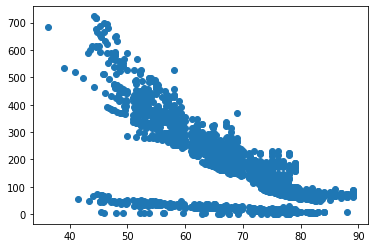

In [20]:
plt.scatter(single_feature_data['Life expectancy ' ],single_feature_data['Adult Mortality'])

In [21]:
X = single_feature_data.drop(['Life expectancy '], axis = 1)
Y= single_feature_data['Life expectancy ']

In [22]:
X_single_train, X_single_test, Y_single_train, Y_single_test = train_test_split(X,Y, train_size=0.8)

## single variable Linear Regression Model

In [23]:
single_Linear_model = LinearRegression()
single_Linear_model.fit(X_single_train,Y_single_train)

LinearRegression()

In [24]:
single_Linear_model.score(X_single_test, Y_single_test)

0.49711848128726455

In [25]:
rmse_single_Linear_train  =  np.sqrt(mean_squared_error(Y_single_train , single_Linear_model.predict(X_single_train)))
mae_single_Linear_train = mean_absolute_error(Y_single_train , single_Linear_model.predict(X_single_train))
print("root mean squared error : ", rmse_single_Linear_train)
print("mean absolute error : ", mae_single_Linear_train)

root mean squared error :  6.868292353546761
mean absolute error :  4.839897628982059


In [26]:
rmse_single_Linear_test  =  np.sqrt(mean_squared_error(Y_single_test , single_Linear_model.predict(X_single_test)))
mae_single_Linear_test = mean_absolute_error(Y_single_test , single_Linear_model.predict(X_single_test))
print("root mean squared error : ", rmse_single_Linear_test)
print("mean absolute error : ", mae_single_Linear_test)

root mean squared error :  6.641210439357417
mean absolute error :  4.7641309413040895


## single variable quadratic Linear Regression Model

In [27]:
poly2 = PolynomialFeatures(degree= 2, include_bias= False)
quadratic_single_features_train = poly2.fit_transform(X_single_train)
quadratic_single_features_train.shape

(2350, 2)

In [28]:
quadratic_single_features_test = poly2.fit_transform(X_single_test)

In [29]:
single_quadratic_model = LinearRegression()
single_quadratic_model.fit(quadratic_single_features_train,Y_single_train)

LinearRegression()

In [30]:
single_quadratic_model.score(quadratic_single_features_test, Y_single_test)

0.5104193171546023

In [31]:
rmse_single_quadratic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_quadratic_model.predict(quadratic_single_features_train)))
mae_single_quadratic_train = mean_absolute_error(Y_single_train , single_quadratic_model.predict(quadratic_single_features_train))
print("root mean squared error : ", rmse_single_quadratic_train)
print("mean absolute error : ", mae_single_quadratic_train)

root mean squared error :  6.749141014978261
mean absolute error :  4.800973467428455


In [32]:
rmse_single_quadratic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_quadratic_model.predict(quadratic_single_features_test)))
mae_single_quadratic_test = mean_absolute_error(Y_single_test , single_quadratic_model.predict(quadratic_single_features_test))
print("root mean squared error : ", rmse_single_quadratic_test)
print("mean absolute error : ", mae_single_quadratic_test)

root mean squared error :  6.552794390317189
mean absolute error :  4.737834643290052


## single variable cubic Regression Model

In [33]:
poly3 = PolynomialFeatures(degree= 3, include_bias= False)
cubic_single_features_test = poly3.fit_transform(X_single_test)
cubic_single_features_train = poly3.fit_transform(X_single_train)
cubic_single_features_train.shape

(2350, 3)

In [34]:
single_cubic_model = LinearRegression()
single_cubic_model.fit(cubic_single_features_train,Y_single_train)

LinearRegression()

In [35]:
single_cubic_model.score(cubic_single_features_test, Y_single_test)

0.5863687160978437

In [36]:
rmse_single_cubic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_cubic_model.predict(cubic_single_features_train)))
mae_single_cubic_train = mean_absolute_error(Y_single_train , single_cubic_model.predict(cubic_single_features_train))
print("root mean squared error : ", rmse_single_cubic_train)
print("mean absolute error : ", mae_single_cubic_train)

root mean squared error :  6.196217335448624
mean absolute error :  4.142302888328426


In [37]:
rmse_single_cubic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_cubic_model.predict(cubic_single_features_test)))
mae_single_cubic_test = mean_absolute_error(Y_single_test , single_cubic_model.predict(cubic_single_features_test))
print("root mean squared error : ", rmse_single_cubic_test)
print("mean absolute error : ", mae_single_cubic_test)

root mean squared error :  6.023114140287135
mean absolute error :  4.143872759800894


## single variable biquadratic Regression Model

In [38]:
poly4 = PolynomialFeatures(degree= 4, include_bias= False)
biquadratic_single_features_test = poly4.fit_transform(X_single_test)
biquadratic_single_features_train = poly4.fit_transform(X_single_train)
biquadratic_single_features_train.shape

(2350, 4)

In [39]:
single_biquadratic_model = LinearRegression()
single_biquadratic_model.fit(biquadratic_single_features_train, Y_single_train)

LinearRegression()

In [40]:
single_biquadratic_model.score(biquadratic_single_features_test, Y_single_test)

0.6129265863788559

In [41]:
rmse_single_biquadratic_train  =  np.sqrt(mean_squared_error(Y_single_train , single_biquadratic_model.predict(biquadratic_single_features_train)))
mae_single_biquadratic_train = mean_absolute_error(Y_single_train , single_biquadratic_model.predict(biquadratic_single_features_train))
print("root mean squared error : ", rmse_single_biquadratic_train)
print("mean absolute error : ", mae_single_biquadratic_train)

root mean squared error :  5.993028410832365
mean absolute error :  3.8534189823491887


In [42]:
rmse_single_biquadratic_test  =  np.sqrt(mean_squared_error(Y_single_test , single_biquadratic_model.predict(biquadratic_single_features_test)))
mae_single_biquadratic_test = mean_absolute_error(Y_single_test , single_biquadratic_model.predict(biquadratic_single_features_test))
print("root mean squared error : ", rmse_single_biquadratic_test)
print("mean absolute error : ", mae_single_biquadratic_test)

root mean squared error :  5.826544605228608
mean absolute error :  3.9140136292120955


## single variable pentanomial Regression Model

In [43]:
poly5 = PolynomialFeatures(degree= 5, include_bias= False)
pentanomial_single_features_test = poly5.fit_transform(X_single_test)
pentanomial_single_features_train = poly5.fit_transform(X_single_train)
pentanomial_single_features_train.shape

(2350, 5)

In [44]:
single_pentanomial_model = LinearRegression()
single_pentanomial_model.fit(pentanomial_single_features_train, Y_single_train)

LinearRegression()

In [45]:
single_pentanomial_model.score(pentanomial_single_features_test, Y_single_test)

0.6134637604311488

In [46]:
rmse_single_pentanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_pentanomial_model.predict(pentanomial_single_features_train)))
mae_single_pentanomial_train = mean_absolute_error(Y_single_train , single_pentanomial_model.predict(pentanomial_single_features_train))
print("root mean squared error : ", rmse_single_pentanomial_train)
print("mean absolute error : ", mae_single_pentanomial_train)

root mean squared error :  5.9915614330598
mean absolute error :  3.837544964565516


In [47]:
rmse_single_pentanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_pentanomial_model.predict(pentanomial_single_features_test)))
mae_single_pentanomial_test = mean_absolute_error(Y_single_test , single_pentanomial_model.predict(pentanomial_single_features_test))
print("root mean squared error : ", rmse_single_pentanomial_test)
print("mean absolute error : ", mae_single_pentanomial_test)

root mean squared error :  5.822500210657284
mean absolute error :  3.9031642081596156


## single variable hexanomial Regression Model

In [48]:
poly6 = PolynomialFeatures(degree= 6, include_bias= False)
hexanomial_single_features_test = poly6.fit_transform(X_single_test)
hexanomial_single_features_train = poly6.fit_transform(X_single_train)
hexanomial_single_features_train.shape

(2350, 6)

In [49]:
single_hexanomial_model = LinearRegression()
single_hexanomial_model.fit(hexanomial_single_features_train, Y_single_train)

LinearRegression()

In [50]:
single_hexanomial_model.score(hexanomial_single_features_test, Y_single_test)

0.6152218012542896

In [51]:
rmse_single_hexanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_hexanomial_model.predict(hexanomial_single_features_train)))
mae_single_hexanomial_train = mean_absolute_error(Y_single_train , single_hexanomial_model.predict(hexanomial_single_features_train))
print("root mean squared error : ", rmse_single_hexanomial_train)
print("mean absolute error : ", mae_single_hexanomial_train)

root mean squared error :  5.9444227257083035
mean absolute error :  3.8496791103440193


In [52]:
rmse_single_hexanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_hexanomial_model.predict(hexanomial_single_features_test)))
mae_single_hexanomial_test = mean_absolute_error(Y_single_test , single_hexanomial_model.predict(hexanomial_single_features_test))
print("root mean squared error : ", rmse_single_hexanomial_test)
print("mean absolute error : ", mae_single_hexanomial_test)

root mean squared error :  5.809244197896683
mean absolute error :  3.93556980406175


## single variable heptanomial Regression Model

In [53]:
poly7 = PolynomialFeatures(degree= 7, include_bias= False)
heptanomial_single_features_test = poly7.fit_transform(X_single_test)
heptanomial_single_features_train = poly7.fit_transform(X_single_train)
heptanomial_single_features_train.shape

(2350, 7)

In [54]:
single_heptanomial_model = LinearRegression()
single_heptanomial_model.fit(heptanomial_single_features_train, Y_single_train)

LinearRegression()

In [55]:
single_heptanomial_model.score(heptanomial_single_features_test, Y_single_test)

0.5927717964952675

In [56]:
rmse_single_heptanomial_train  =  np.sqrt(mean_squared_error(Y_single_train , single_heptanomial_model.predict(heptanomial_single_features_train)))
mae_single_heptanomial_train = mean_absolute_error(Y_single_train , single_heptanomial_model.predict(heptanomial_single_features_train))
print("root mean squared error : ", rmse_single_heptanomial_train)
print("mean absolute error : ", mae_single_heptanomial_train)

root mean squared error :  6.158349584969995
mean absolute error :  4.032940413612082


In [57]:
rmse_single_heptanomial_test  =  np.sqrt(mean_squared_error(Y_single_test , single_heptanomial_model.predict(heptanomial_single_features_test)))
mae_single_heptanomial_test = mean_absolute_error(Y_single_test , single_heptanomial_model.predict(heptanomial_single_features_test))
print("root mean squared error : ", rmse_single_heptanomial_test)
print("mean absolute error : ", mae_single_heptanomial_test)

root mean squared error :  5.976312911743566
mean absolute error :  3.9907202795709362


# Models with all the avilable features

## Linear regression model

In [58]:
model_Linear = LinearRegression()
model_Linear.fit(x_train, y_train)

LinearRegression()

In [59]:
model_Linear.score(x_test, y_test)

0.7541556984147635

In [60]:
rmse_Linear_train  =  np.sqrt(mean_squared_error(y_train , model_Linear.predict(x_train)))
mae_Linear_train = mean_absolute_error(y_train , model_Linear.predict(x_train))
print("root mean squared error : ", rmse_Linear_train)
print("mean absolute error : ", mae_Linear_train)

root mean squared error :  4.7376032868599705
mean absolute error :  3.5977758911595012


In [61]:
rmse_Linear_test  =  np.sqrt(mean_squared_error(y_test , model_Linear.predict(x_test)))
mae_Linear_test = mean_absolute_error(y_test , model_Linear.predict(x_test))
print("root mean squared error : ", rmse_Linear_test)
print("mean absolute error : ", mae_Linear_test)


root mean squared error :  4.707217562799239
mean absolute error :  3.4990816867014374


In [62]:
model_Linear.coef_

array([ 1.17292660e-01, -2.63270102e-02, -1.54470867e-02,  3.54048103e-01,
        1.67336160e-04, -2.76259865e-02,  2.62064976e-06,  8.30754528e-02,
        4.02821815e-02,  7.08501456e-02, -4.82600137e-01,  7.82744222e-05])

## Quadratic Regression Model

In [63]:
poly2 = PolynomialFeatures(degree= 2, include_bias= False)
quadeatic_features_train = poly2.fit_transform(x_train)

In [64]:
x_train.shape

(2350, 12)

In [65]:
quadeatic_features_train.shape

(2350, 90)

In [66]:
quadeatic_features_test = poly2.fit_transform(x_test)

In [67]:
model_Quadratic = LinearRegression()
model_Quadratic.fit(quadeatic_features_train, y_train)

LinearRegression()

In [68]:
model_Quadratic.score(quadeatic_features_test, y_test)

0.8534794416483015

In [69]:
rmse_Quadratic_train  =  np.sqrt(mean_squared_error(y_train , model_Quadratic.predict(quadeatic_features_train)))
mae_Quadratic_train = mean_absolute_error(y_train , model_Quadratic.predict(quadeatic_features_train))
print("root mean squared error : ", rmse_Quadratic_train)
print("mean absolute error : ", mae_Quadratic_train)

root mean squared error :  3.3826224503215
mean absolute error :  2.477233774559755


In [70]:
rmse_Quadratic_test  =  np.sqrt(mean_squared_error(y_test , model_Quadratic.predict(quadeatic_features_test)))
mae_Quadratic_test = mean_absolute_error(y_test , model_Quadratic.predict(quadeatic_features_test))
print("root mean squared error : ", rmse_Quadratic_test)
print("mean absolute error : ", mae_Quadratic_test)

root mean squared error :  3.6339879323734587
mean absolute error :  2.579126504443397


## Cubic Regression Model

In [71]:
poly3 = PolynomialFeatures(degree= 3, include_bias= False)
cubic_features_train = poly3.fit_transform(x_train)

In [72]:
x_train.shape

(2350, 12)

In [73]:
cubic_features_train.shape

(2350, 454)

In [74]:
cubic_features_test = poly3.fit_transform(x_test)

In [75]:
cubic_features_test.shape

(588, 454)

In [76]:
model_Cubic = LinearRegression()
model_Cubic.fit(cubic_features_train, y_train)

LinearRegression()

In [77]:
model_Cubic.score(cubic_features_test, y_test)

0.36513218735004627

In [78]:
rmse_Cubic_train  =  np.sqrt(mean_squared_error(y_train , model_Cubic.predict(cubic_features_train)))
mae_Cubic_train = mean_absolute_error(y_train , model_Cubic.predict(cubic_features_train))
print("root mean squared error : ", rmse_Cubic_train)
print("mean absolute error : ", mae_Cubic_train)

root mean squared error :  3.0931163295629394
mean absolute error :  2.2725924074041473


In [79]:
rmse_Cubic_test  =  np.sqrt(mean_squared_error(y_test , model_Cubic.predict(cubic_features_test)))
mae_Cubic_test = mean_absolute_error(y_test , model_Cubic.predict(cubic_features_test))
print("root mean squared error : ", rmse_Cubic_test)
print("mean absolute error : ", mae_Cubic_test)

root mean squared error :  7.564423808960748
mean absolute error :  3.7629817912337984


#### we observed a drastic drop in score from Quadratic to Linear So we will stop the increase in degree here as the model suffer from overfitting

## Using PCA on over fitted Cubic regression model to observe the change.

In [80]:
pca = PCA(n_components=40)
cubic_features_train_pca = pca.fit_transform(cubic_features_train)
cubic_features_test_pca = pca.fit_transform(cubic_features_test)

In [81]:
cubic_features_train_pca.shape

(2350, 40)

In [82]:
model_Cubic_pca = LinearRegression()
model_Cubic_pca.fit(cubic_features_train_pca, y_train)

LinearRegression()

In [83]:
model_Cubic_pca.score(cubic_features_test_pca, y_test)

-0.0027554661660789126

#### that didnt work out well so we can tell that the PCA decomposition cant solve overfitting.

## Biquadratic Regression Model

In [84]:
poly4 = PolynomialFeatures(degree= 4, include_bias= False)
biquadratic_features_train = poly4.fit_transform(x_train)
biquadratic_features_train.shape

(2350, 1819)

In [85]:
biquadratic_features_test = poly4.fit_transform(x_test)
biquadratic_features_test.shape

(588, 1819)

In [86]:
model_Biquadratic = LinearRegression()
model_Biquadratic.fit(biquadratic_features_train, y_train)

LinearRegression()

In [87]:
model_Biquadratic.score(biquadratic_features_test, y_test)

-468.8641691382015

# Analysis of Performance of different models

## For single variable regression

[6.868292353546761, 6.749141014978261, 6.196217335448624, 5.993028410832365, 5.9915614330598, 5.9444227257083035, 6.158349584969995]


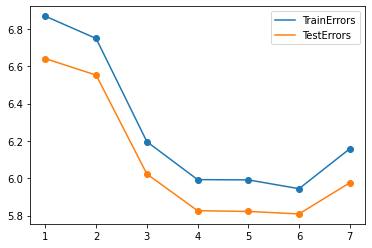

In [88]:
Degrees_of_regression = [1, 2, 3,4,5,6,7]
Train_errors = [rmse_single_Linear_train, rmse_single_quadratic_train, rmse_single_cubic_train, rmse_single_biquadratic_train, rmse_single_pentanomial_train, rmse_single_hexanomial_train, rmse_single_heptanomial_train]
Test_errors = [rmse_single_Linear_test, rmse_single_quadratic_test, rmse_single_cubic_test, rmse_single_biquadratic_test, rmse_single_pentanomial_test, rmse_single_hexanomial_test, rmse_single_heptanomial_test]
plt.plot(Degrees_of_regression,Train_errors, label = "TrainErrors")
plt.plot(Degrees_of_regression,Test_errors, label = "TestErrors")
plt.legend()
plt.scatter(Degrees_of_regression,Train_errors)
plt.scatter(Degrees_of_regression,Test_errors)
print(Train_errors)

#### by analysing the errors the hexanomial regression is best for this single variable regression

## For multivariable regression

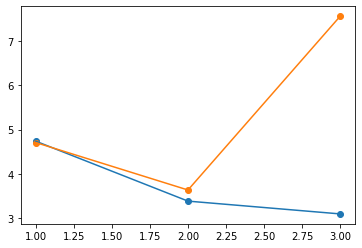

In [89]:
Degrees_of_regression = [1, 2, 3]
Train_errors = [rmse_Linear_train, rmse_Quadratic_train, rmse_Cubic_train]
Test_errors = [rmse_Linear_test, rmse_Quadratic_test, rmse_Cubic_test]
plt.plot(Degrees_of_regression,Train_errors)
plt.plot(Degrees_of_regression,Test_errors)
plt.scatter(Degrees_of_regression,Train_errors)
plt.scatter(Degrees_of_regression,Test_errors)


#### after a regression of degree 2 the model shows the problem of overfitting. So we can conclude that the quadratic regression will be the best model for the given regression scenario